In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('heart.csv')

In [3]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Univarient analysis

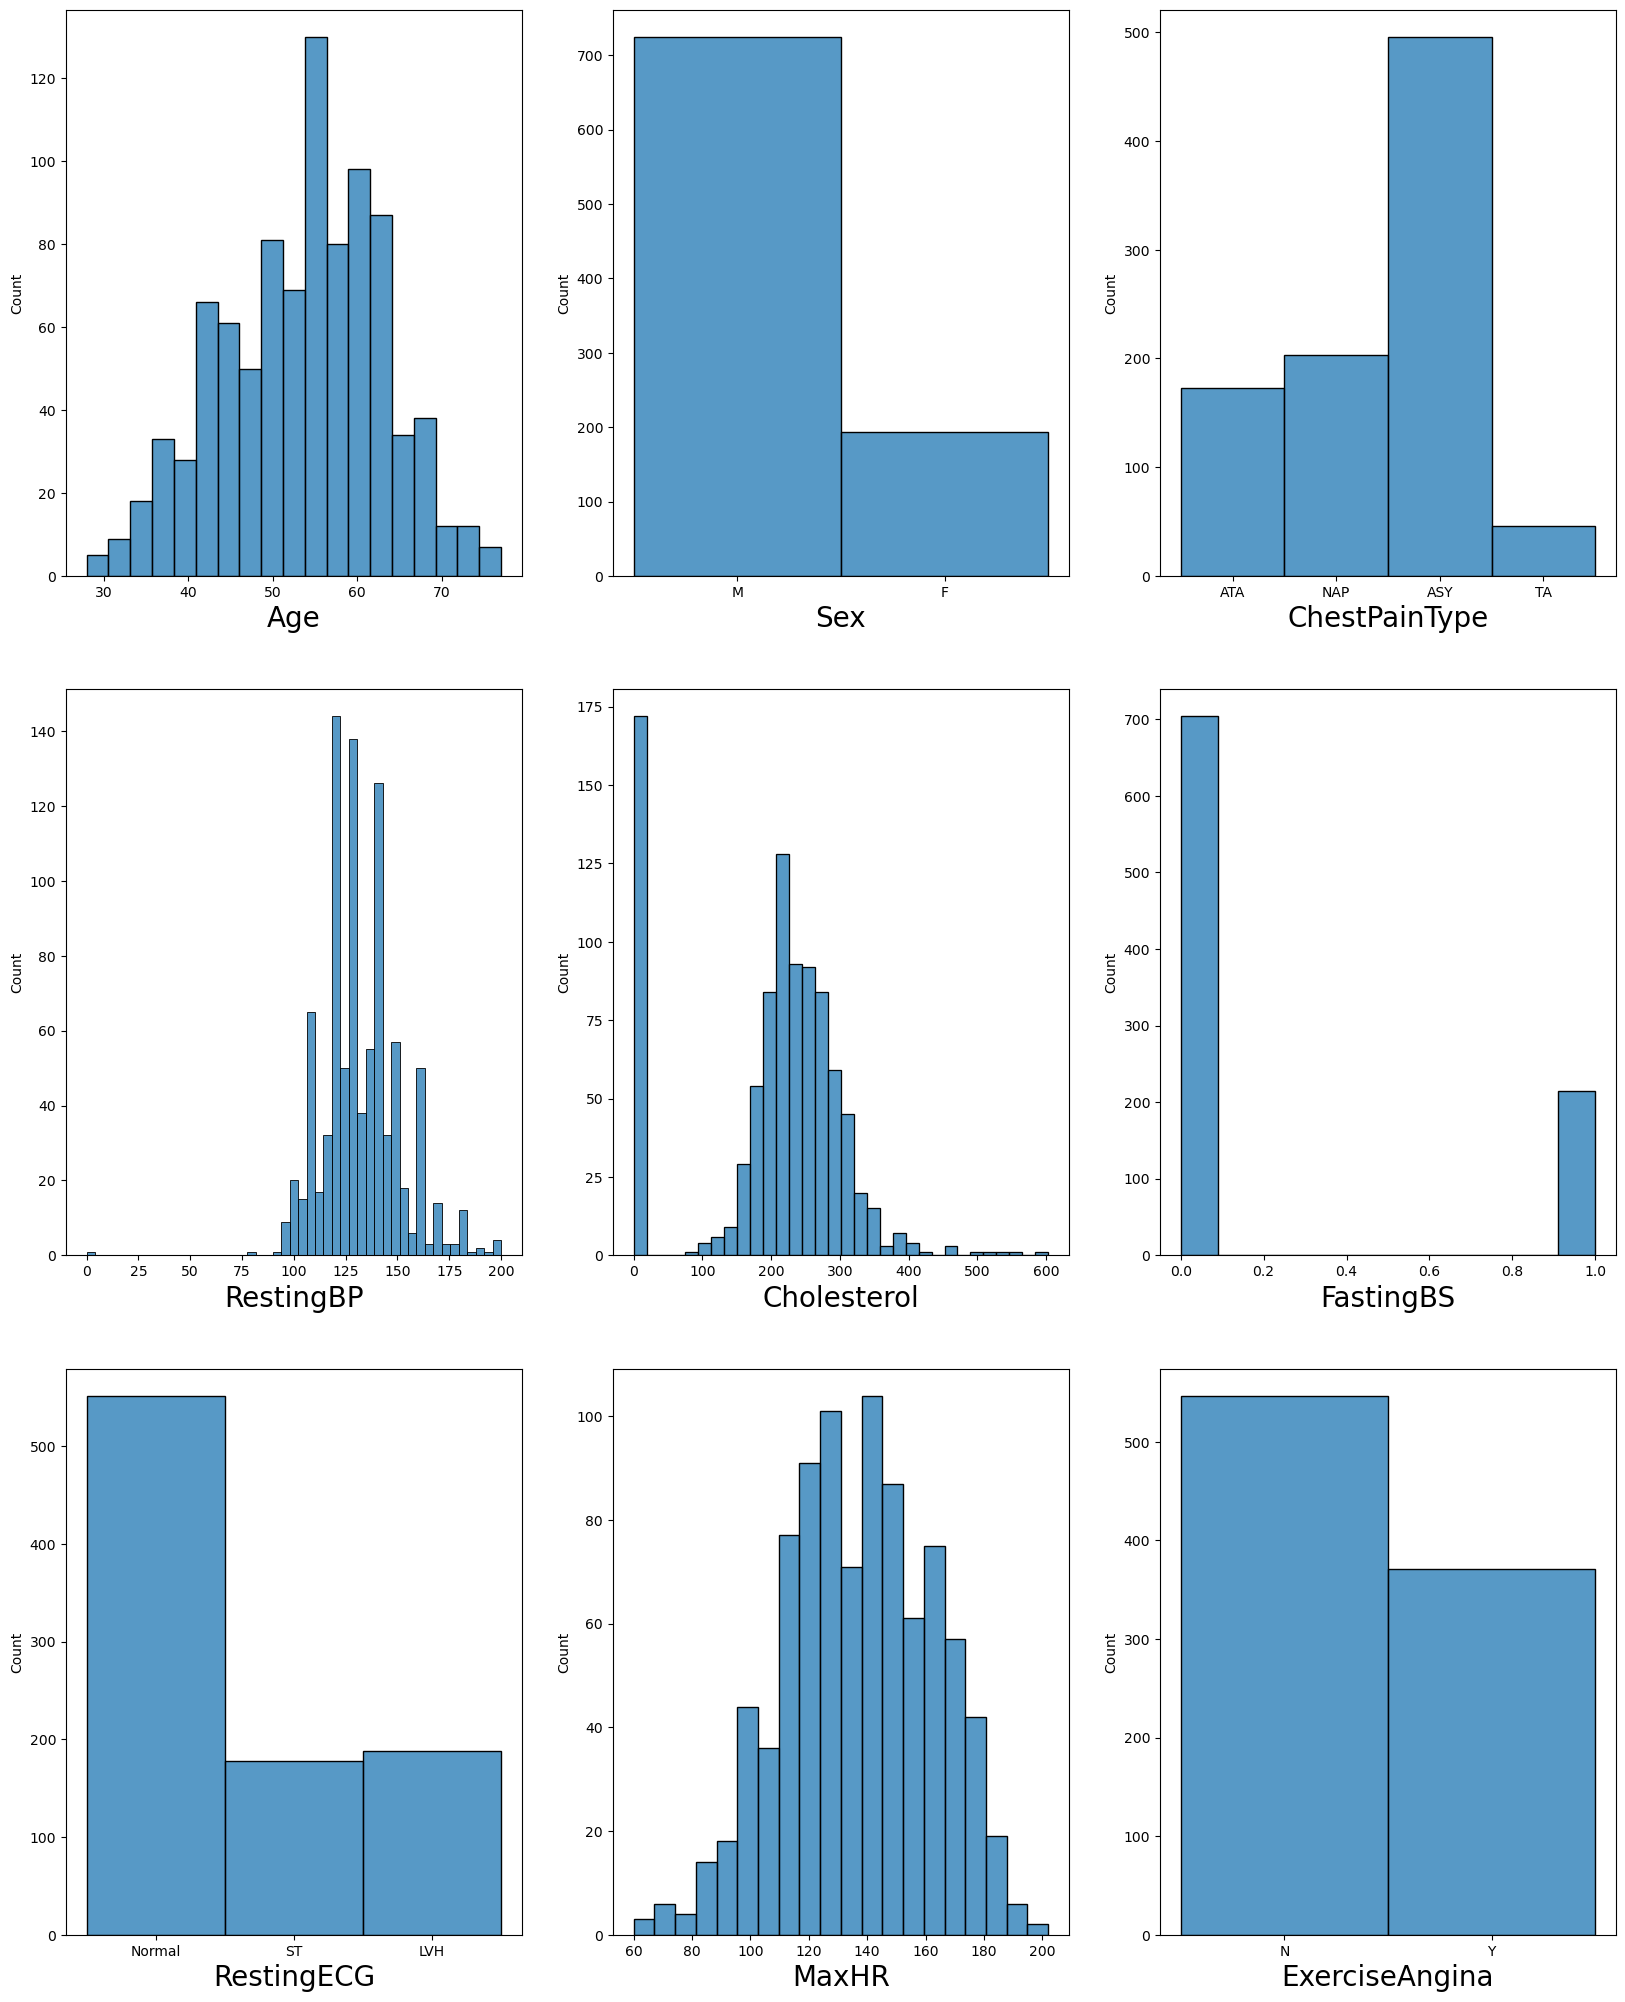

In [6]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data.columns:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(x=data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()
    

# Bivarient Analysis

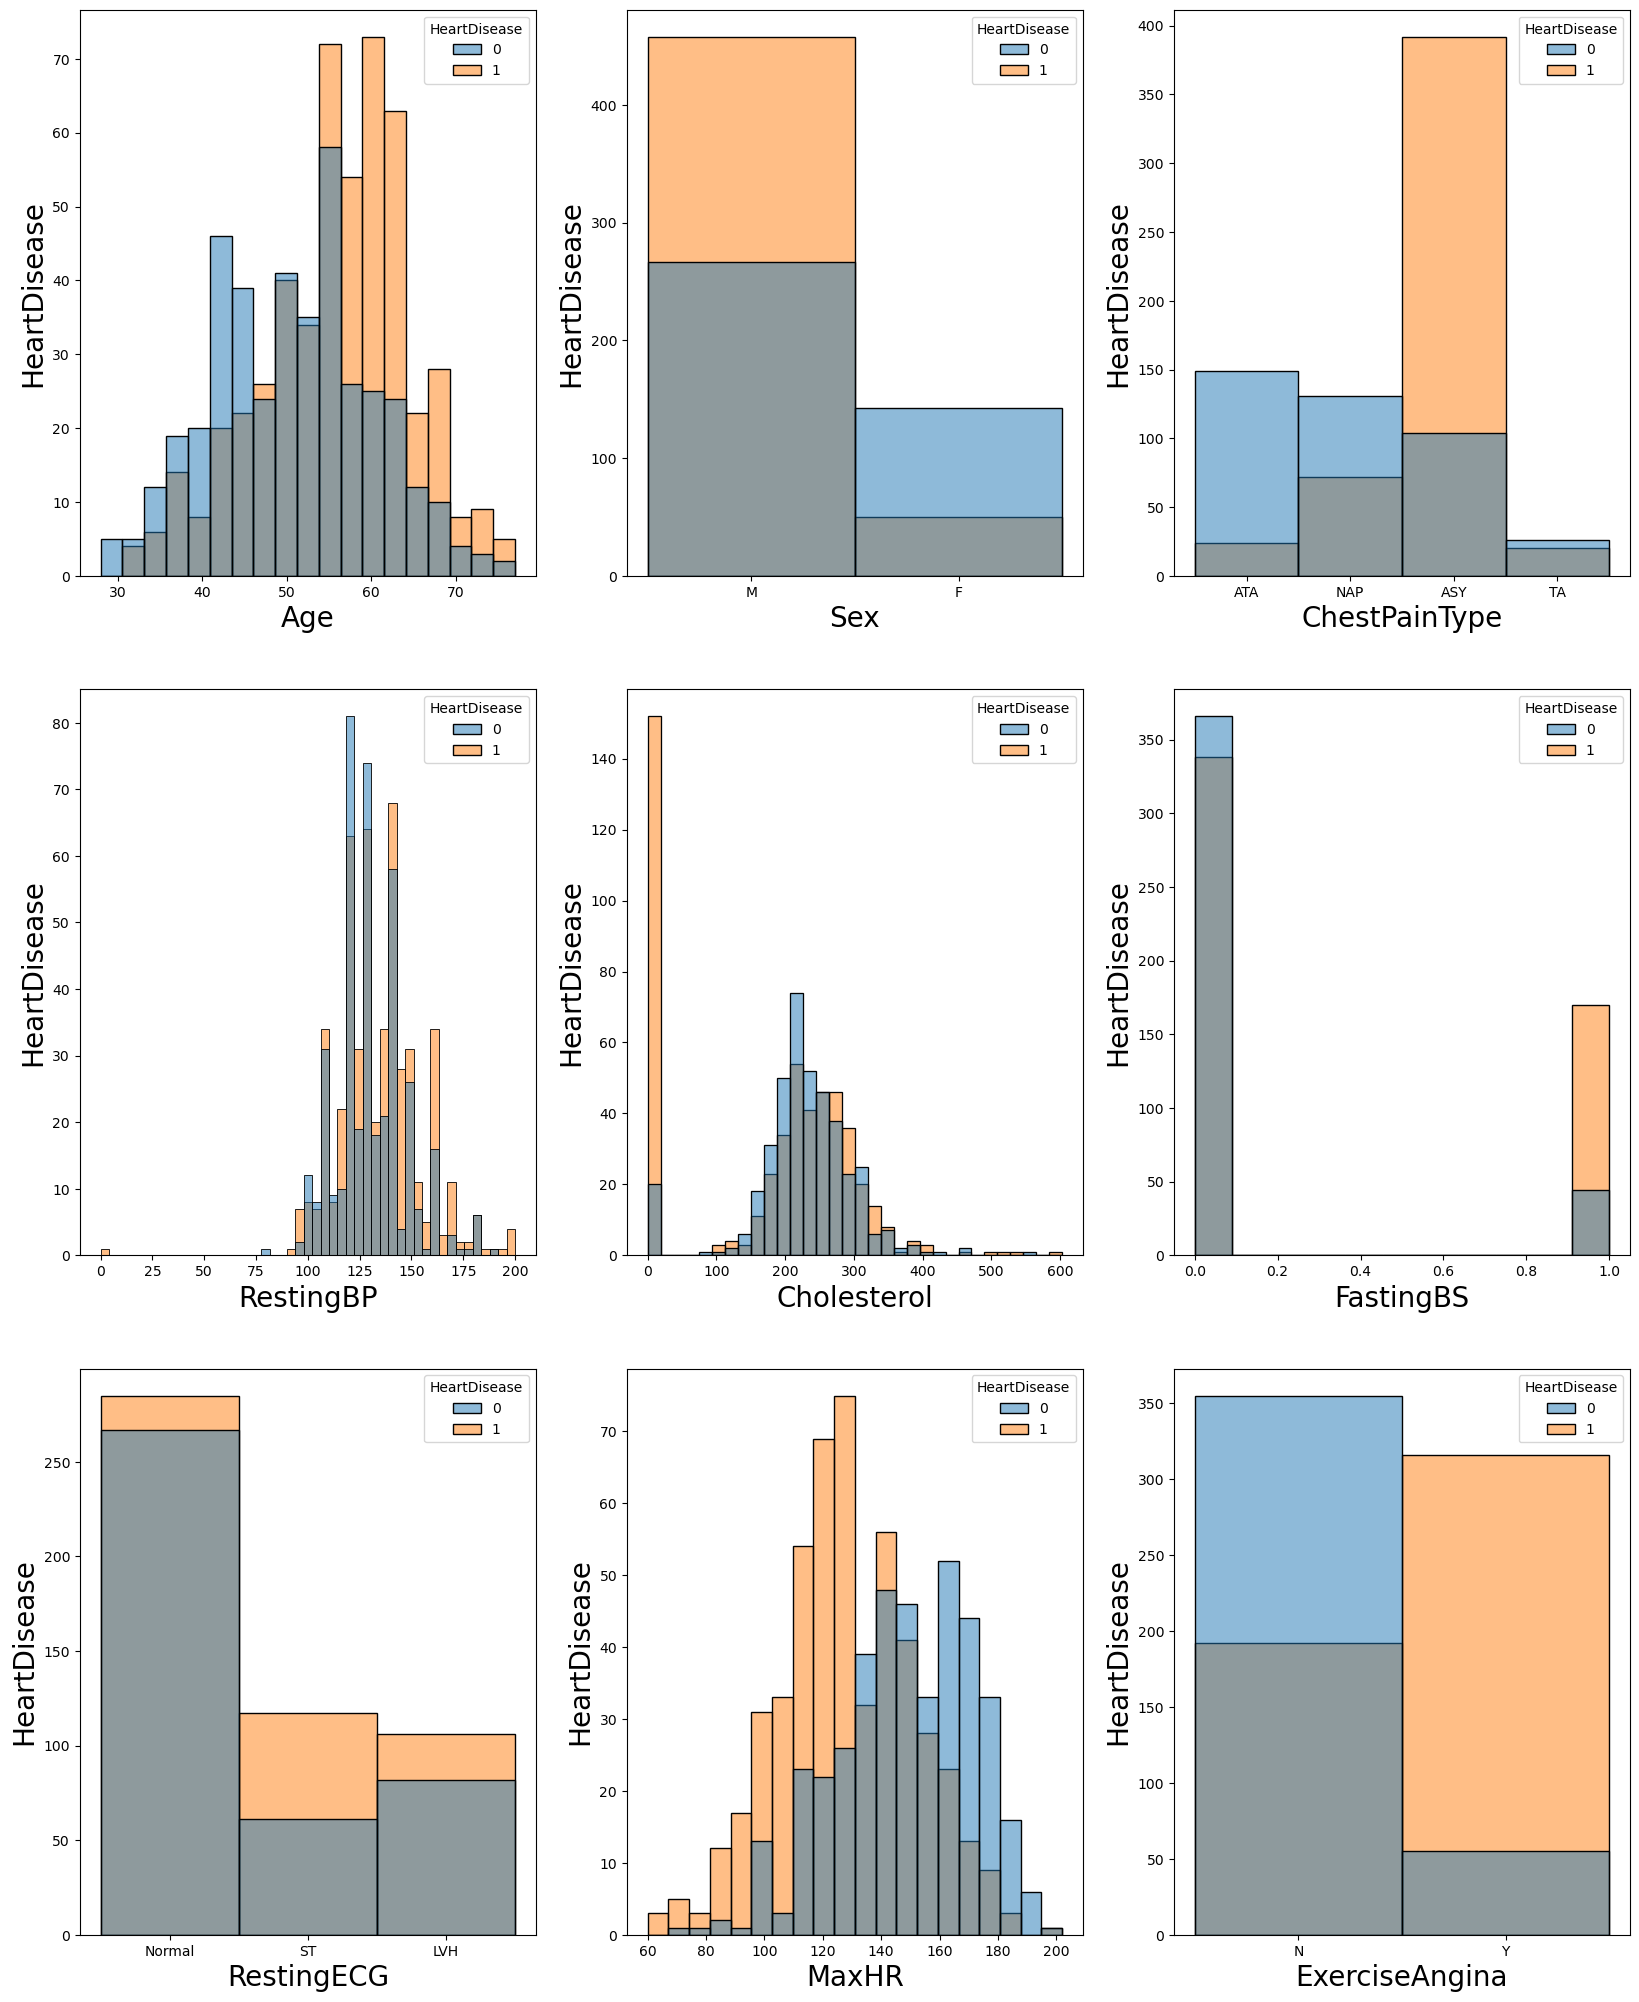

In [7]:
plt.figure(figsize=(20,25),facecolor=('white'))
plotnumber=1

for column in data.columns:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(x=data[column],hue=data.HeartDisease)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('HeartDisease',fontsize=20)
    plotnumber+=1
plt.show()

# data Processcing

In [8]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# converting the categorical data into numeric

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# 1.Sex

In [10]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
data.Sex=lb.fit_transform(data['Sex'])

In [26]:
lb=LabelEncoder()
data.Sex=lb.fit_transform(data['Sex'])

In [27]:
data

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,2,172,N,0.0,Up,0
1,49,0,2,160,180,0,2,156,N,1.0,Flat,1
2,37,1,1,130,283,0,0,98,N,0.0,Up,0
3,48,0,3,138,214,0,2,108,Y,1.5,Flat,1
4,54,1,2,150,195,0,2,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,1,110,264,0,2,132,N,1.2,Flat,1
914,68,1,3,144,193,1,2,141,N,3.4,Flat,1
915,57,1,3,130,131,0,2,115,Y,1.2,Flat,1
916,57,0,1,130,236,0,1,174,N,0.0,Flat,1


# 2.ChestPainType

In [12]:
data.rename({'ChestPainType': 'cpt'},axis=1,inplace=True)

In [13]:
data

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [14]:
data.cpt.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [16]:
data.cpt.value_counts()

cpt
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [17]:
data.loc[data['cpt']=='ASY','cpt']=3
data.loc[data['cpt']=='NAP','cpt']=2
data.loc[data['cpt']=='ATA','cpt']=1
data.loc[data['cpt']=='TA','cpt']=1

In [18]:
data

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,1,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,2,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,1,130,283,0,ST,98,N,0.0,Up,0
3,48,F,3,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,2,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,1,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,3,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,3,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,1,130,236,0,LVH,174,N,0.0,Flat,1


# 3.RestingECG

In [19]:
data.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [20]:
data.RestingECG.value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [21]:
data.loc[data['RestingECG']=='Normal','RestingECG']=2
data.loc[data['RestingECG']=='LVH','RestingECG']=1
data.loc[data['RestingECG']=='ST','RestingECG']=0

In [22]:
data

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,1,140,289,0,2,172,N,0.0,Up,0
1,49,F,2,160,180,0,2,156,N,1.0,Flat,1
2,37,M,1,130,283,0,0,98,N,0.0,Up,0
3,48,F,3,138,214,0,2,108,Y,1.5,Flat,1
4,54,M,2,150,195,0,2,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,1,110,264,0,2,132,N,1.2,Flat,1
914,68,M,3,144,193,1,2,141,N,3.4,Flat,1
915,57,M,3,130,131,0,2,115,Y,1.2,Flat,1
916,57,F,1,130,236,0,1,174,N,0.0,Flat,1


# 4.ExerciseAngina

In [23]:
data.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [28]:
data.ExerciseAngina=lb.fit_transform(data['ExerciseAngina'])

In [29]:
data

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,2,172,0,0.0,Up,0
1,49,0,2,160,180,0,2,156,0,1.0,Flat,1
2,37,1,1,130,283,0,0,98,0,0.0,Up,0
3,48,0,3,138,214,0,2,108,1,1.5,Flat,1
4,54,1,2,150,195,0,2,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,1,110,264,0,2,132,0,1.2,Flat,1
914,68,1,3,144,193,1,2,141,0,3.4,Flat,1
915,57,1,3,130,131,0,2,115,1,1.2,Flat,1
916,57,0,1,130,236,0,1,174,0,0.0,Flat,1


# 5.ST_Slope

In [30]:
data.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [31]:
data.ST_Slope.value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [32]:
data.loc[data['ST_Slope']=='Flat','ST_Slope']=1
data.loc[data['ST_Slope']=='Up','ST_Slope']=2
data.loc[data['ST_Slope']=='Down','ST_Slope']=3

In [33]:
data

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,2,172,0,0.0,2,0
1,49,0,2,160,180,0,2,156,0,1.0,1,1
2,37,1,1,130,283,0,0,98,0,0.0,2,0
3,48,0,3,138,214,0,2,108,1,1.5,1,1
4,54,1,2,150,195,0,2,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,1,110,264,0,2,132,0,1.2,1,1
914,68,1,3,144,193,1,2,141,0,3.4,1,1
915,57,1,3,130,131,0,2,115,1,1.2,1,1
916,57,0,1,130,236,0,1,174,0,0.0,1,1


# Feature Selection

<Axes: >

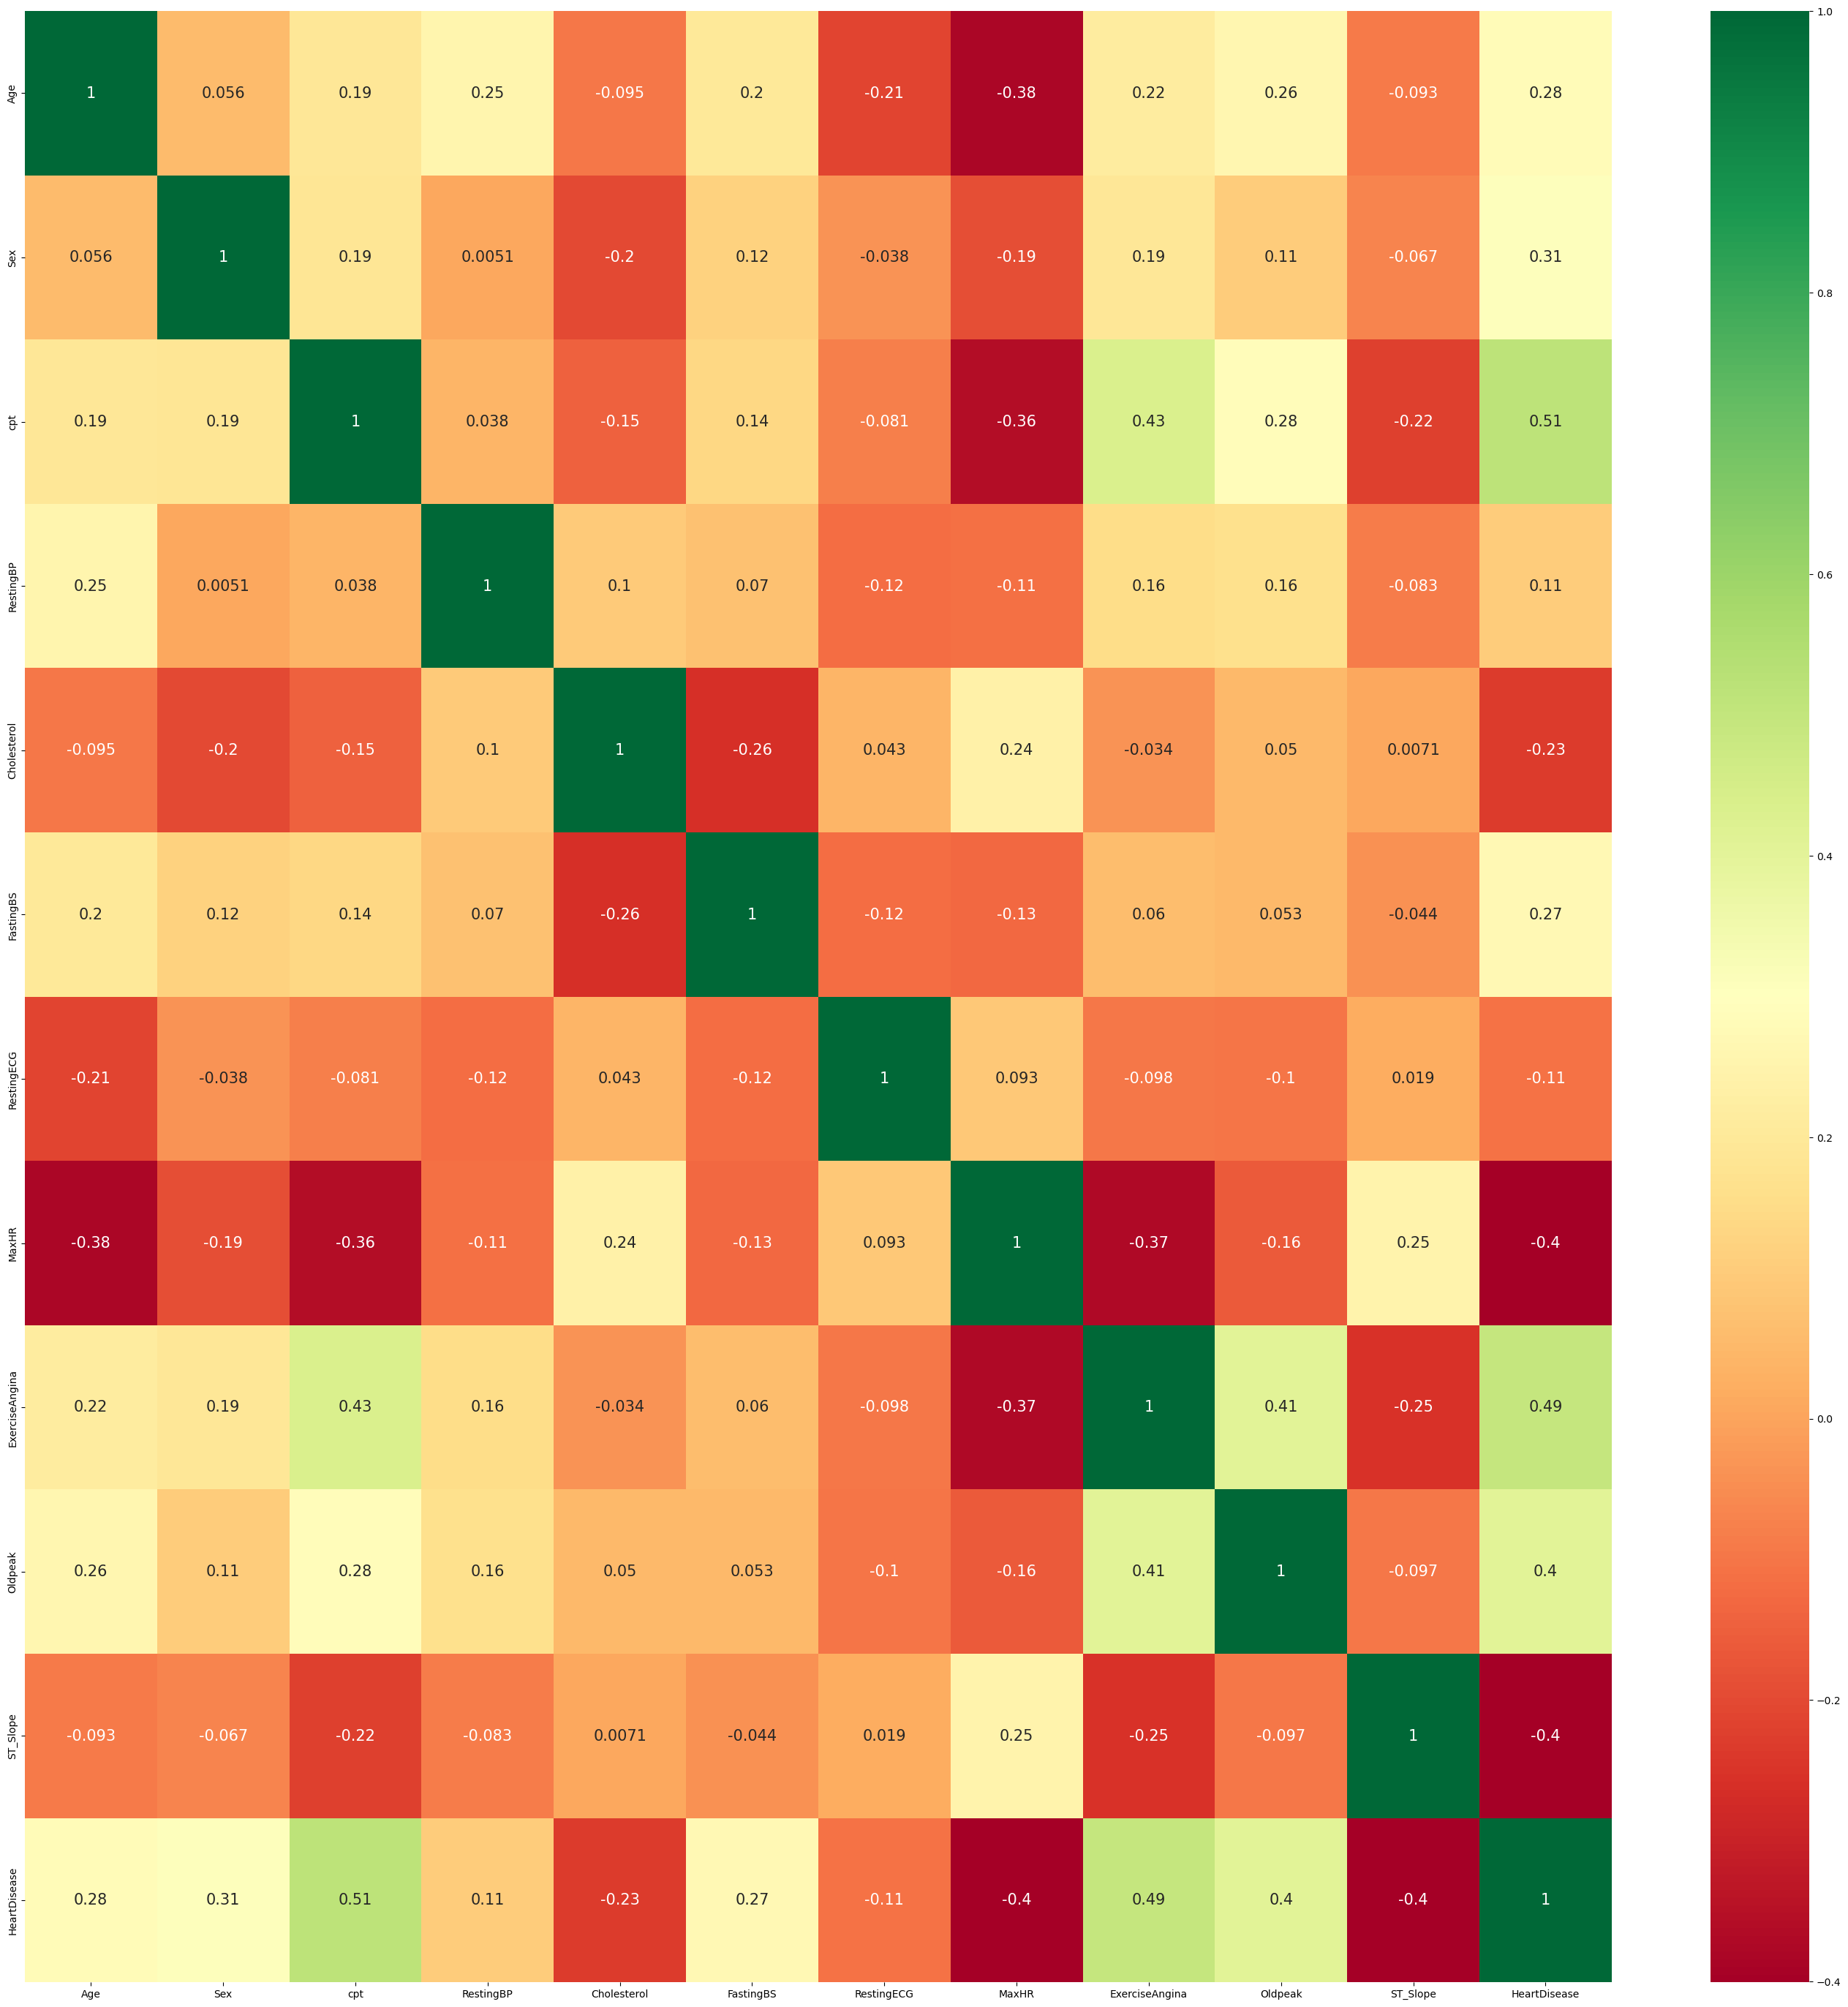

In [41]:
plt.figure(figsize=(35,35))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={'size':15})
# sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={'size':15})#plotting heat map to check correlation

# Model Creation

In [45]:
X=data.drop('HeartDisease',axis=1)
y=data['HeartDisease']

In [46]:
X

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,2,172,0,0.0,2
1,49,0,2,160,180,0,2,156,0,1.0,1
2,37,1,1,130,283,0,0,98,0,0.0,2
3,48,0,3,138,214,0,2,108,1,1.5,1
4,54,1,2,150,195,0,2,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,1,110,264,0,2,132,0,1.2,1
914,68,1,3,144,193,1,2,141,0,3.4,1
915,57,1,3,130,131,0,2,115,1,1.2,1
916,57,0,1,130,236,0,1,174,0,0.0,1


In [47]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3)

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_gb=gb.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report# to check model performance
accu_scor=accuracy_score(y_test,y_gb)
accu_scor

0.8826086956521739

In [60]:
!pip3 install xgboost

In [61]:
import xgboost 

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   cpt             918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(2), int64(6), object(3)
memory usage: 79.0+ KB


In [63]:
X_train.cpt=X_train.cpt.astype('int64')
X_train.RestingECG=X_train.RestingECG.astype('int64')
X_train.ST_Slope=X_train.ST_Slope.astype('int64')

In [64]:
X_test.cpt=X_test.cpt.astype('int64')
X_test.RestingECG=X_test.RestingECG.astype('int64')
X_test.ST_Slope=X_test.ST_Slope.astype('int64')

In [66]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_hat=xgb.predict(X_test)

In [67]:
y_hat

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [71]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       104
           1       0.91      0.86      0.88       126

    accuracy                           0.87       230
   macro avg       0.87      0.88      0.87       230
weighted avg       0.88      0.87      0.87       230



# Hyperparameter tunning for XGBoosting

In [73]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200], #penalty parameter alpha works for absolute error....rig regression
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}#square error...laso regression
#while testing the error should not be exceeded if it is exceeded....so this penalty parameter is used
XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

                        
rcv.fit(X_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 51.2, 'reg_alpha': 0.1, 'n_estimators': 130, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0})


In [74]:
XGB2=XGBClassifier(reg_lambda= 12.8, reg_alpha= 0.1, n_estimators=150, max_depth=5, learning_rate=0.1, gamma=0.8)
XGB2.fit(X_train, y_train)#training 
y_predict=XGB2.predict(X_test)#testing
f1_score=f1_score(y_predict,y_test)

In [75]:
f1_score

0.899598393574297

In [76]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       104
           1       0.91      0.89      0.90       126

    accuracy                           0.89       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230

